# DAT257x: Reinforcement Learning Explained

## Lab 2: Bandits

### Exercise 2.2B: Optimistic Greedy

In [1]:
import numpy as np
import sys

if "../" not in sys.path:
    sys.path.append("../") 

from lib.envs.bandit import BanditEnv
from lib.simulation import Experiment

In [2]:
#Policy interface
class Policy:
    #num_actions: (int) Number of arms [indexed by 0 ... num_actions-1]
    def __init__(self, num_actions):
        self.num_actions = num_actions
    
    def act(self):
        pass
        
    def feedback(self, action, reward):
        pass

In [30]:
#Greedy policy
class Greedy(Policy):
    def __init__(self, num_actions):
        Policy.__init__(self, num_actions)
        self.name = "Greedy"
        self.total_rewards = np.zeros(num_actions, dtype = np.longdouble)
        self.total_counts = np.zeros(num_actions, dtype = np.longdouble)
    
    def act(self):        
        current_averages = np.divide(self.total_rewards, self.total_counts, where = self.total_counts > 0)
        current_averages[self.total_counts <= 0] = 0.5      #Correctly handles Bernoulli rewards; over-estimates otherwise        
        current_action = np.argmax(current_averages)
        return current_action
        
    def feedback(self, action, reward):
        self.total_rewards[action] += reward
        self.total_counts[action] += 1

Now let's implement an optimistic greedy policy based on the policy interface. The optimistic greedy policy initialize the ra to a large initial value R, which is implemented in the __init__() function, and then play the greedy algorithm.

We have given you some boiler plate code, you only need to modify the part as indicated.

In [31]:
#Optimistic Greedy policy
class OptimisticGreedy(Greedy):
    def __init__(self, num_actions, initial_value):
        Greedy.__init__(self, num_actions)
        self.name = "Optimistic Greedy"
        self.total_rewards = initial_value * np.ones(num_actions, dtype = np.longdouble)
        self.total_counts = np.ones(num_actions, dtype = np.longdouble)
        
        
    
        

Let's prepare the simulation. We'll use the same parameters as the exercise with the epsilon greedy.

In [32]:
evaluation_seed = 5016
num_actions = 10
trials = 10000
distribution = "bernoulli"

First, let's use R = 0. Run the simulation and observe the results.

Distribution: bernoulli [ 0.93160258  0.10144645  0.65359868  0.39412646  0.67036346  0.46602165
  0.95371529  0.87460326  0.22253422  0.11576875]
Optimal arm: 6


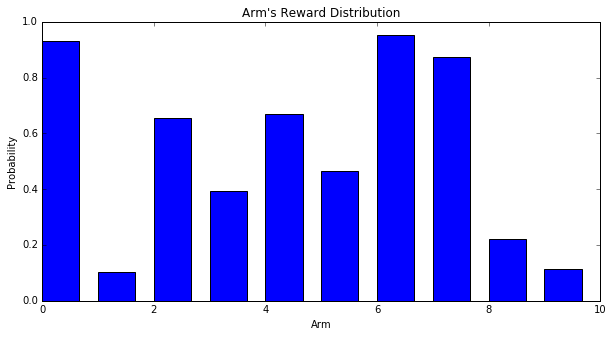

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9313 
Average Regret: 0.0221127079903
Arm pulls: [ 10001.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0]


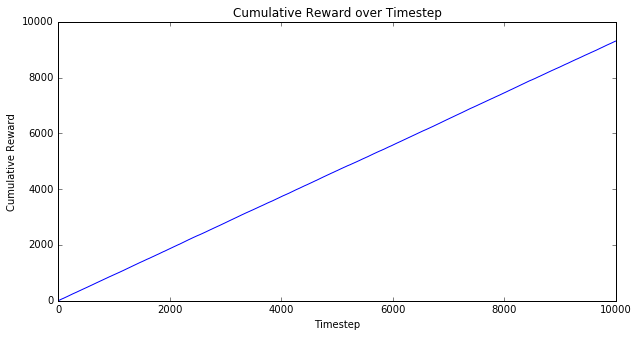

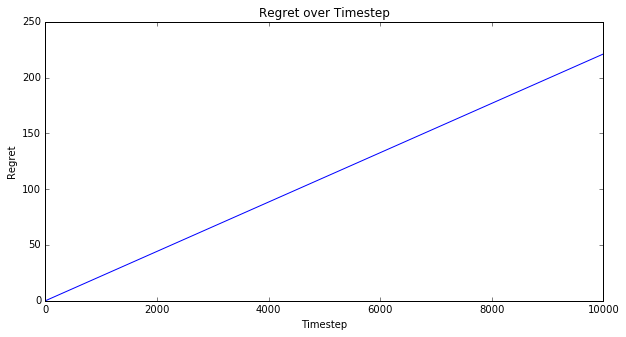

In [33]:
R = 0
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

What about if R is a very large number? Say 10000, the same number as the number of trials? Run the simulation again and observe the results.

Distribution: bernoulli [ 0.93160258  0.10144645  0.65359868  0.39412646  0.67036346  0.46602165
  0.95371529  0.87460326  0.22253422  0.11576875]
Optimal arm: 6


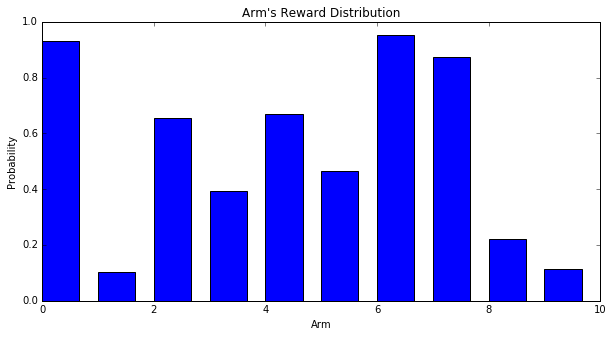

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.5501 
Average Regret: 0.405647554442
Arm pulls: [ 1041.0  959.0  1011.0  987.0  1014.0  992.0  1043.0  1036.0  967.0  960.0]


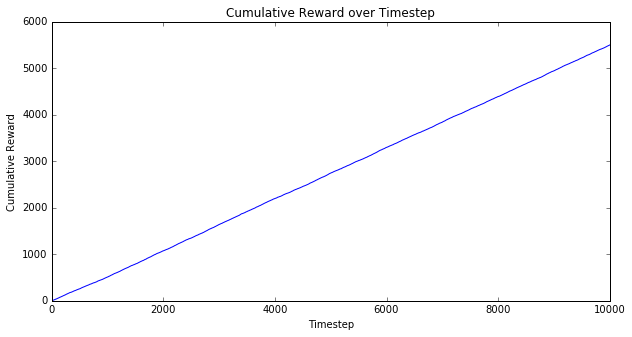

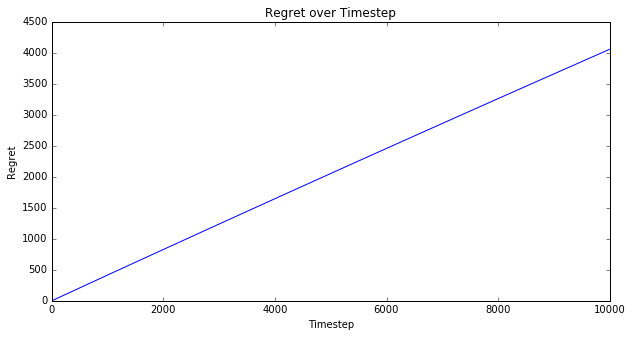

In [34]:
R = 10000
env = BanditEnv(num_actions, distribution, evaluation_seed)
agent = OptimisticGreedy(num_actions, R)
experiment = Experiment(env, agent)
experiment.run_bandit(trials)

Now, try several different number of R (1, 3, 5). Run the simulations and observe the results.

R = 1

Distribution: bernoulli [ 0.93160258  0.10144645  0.65359868  0.39412646  0.67036346  0.46602165
  0.95371529  0.87460326  0.22253422  0.11576875]
Optimal arm: 6


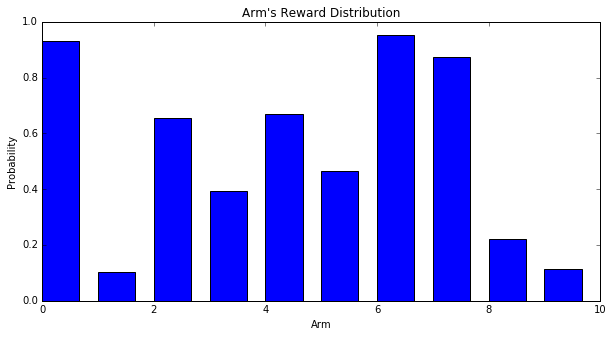

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9308 
Average Regret: 0.0226319941543
Arm pulls: [ 9934.0  2.0  2.0  3.0  7.0  3.0  52.0  3.0  2.0  2.0]


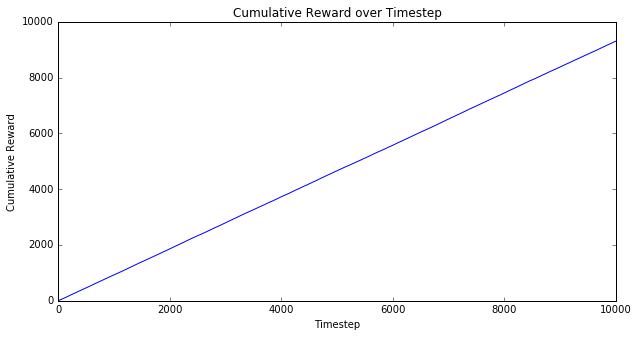

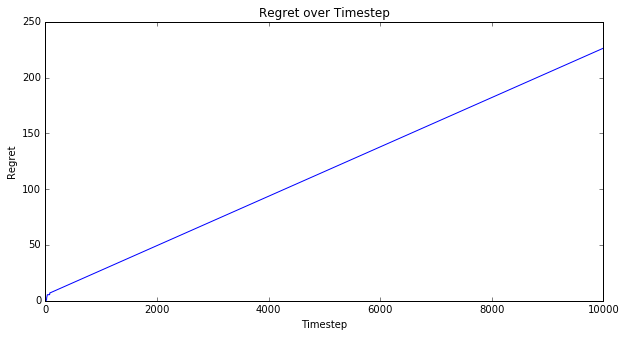

R = 3

Distribution: bernoulli [ 0.93160258  0.10144645  0.65359868  0.39412646  0.67036346  0.46602165
  0.95371529  0.87460326  0.22253422  0.11576875]
Optimal arm: 6


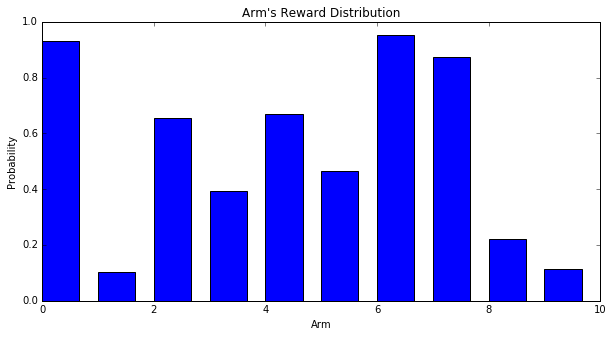

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.9505 
Average Regret: 0.002198560767
Arm pulls: [ 16.0  4.0  8.0  6.0  11.0  8.0  9907.0  42.0  4.0  4.0]


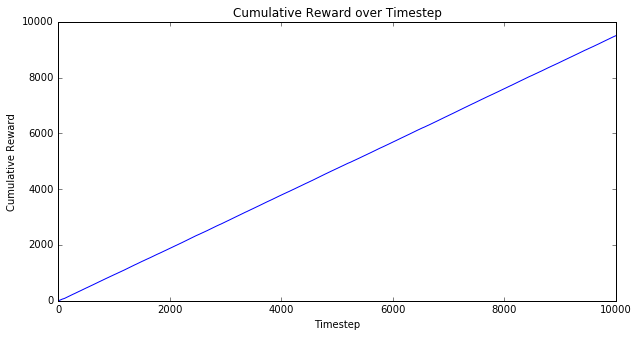

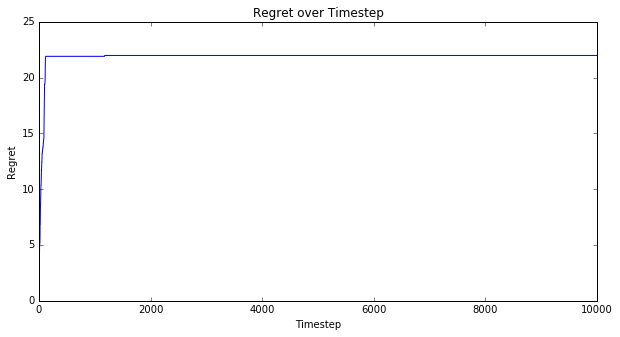

R = 5

Distribution: bernoulli [ 0.93160258  0.10144645  0.65359868  0.39412646  0.67036346  0.46602165
  0.95371529  0.87460326  0.22253422  0.11576875]
Optimal arm: 6


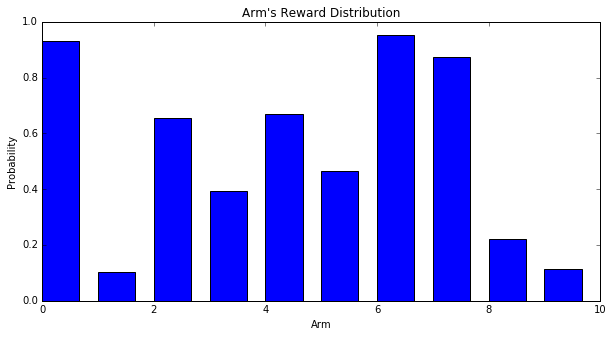

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.949 
Average Regret: 0.00416026411264
Arm pulls: [ 270.0  6.0  12.0  10.0  26.0  7.0  9625.0  39.0  9.0  6.0]


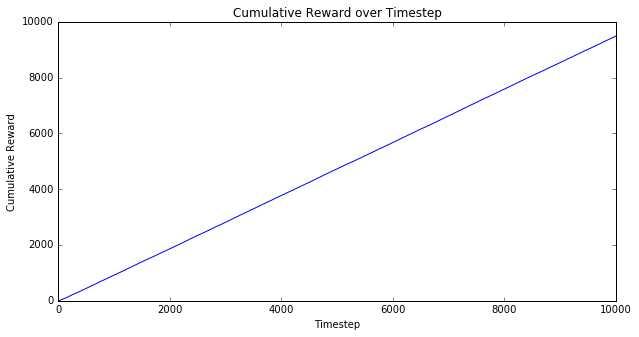

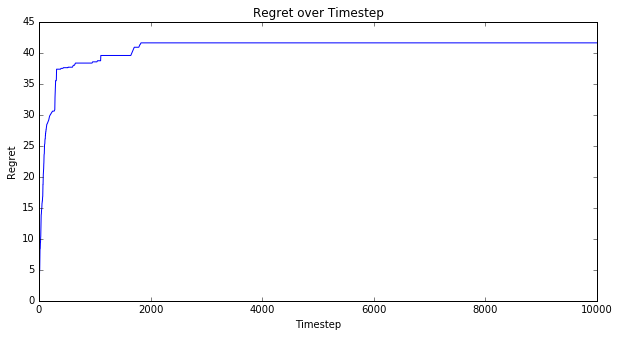

In [36]:
for R in [1, 3, 5]:
    print('R = ' + str(R) + '\n')
    env = BanditEnv(num_actions, distribution, evaluation_seed)
    agent = OptimisticGreedy(num_actions, R)
    experiment = Experiment(env, agent)
    experiment.run_bandit(trials)

Which R performs best with this problem?

Now let's prepare another simulation by setting a different seed. 

In [37]:
evaluation_seed = 1239
num_actions = 10
trials = 10000
distribution = "bernoulli"

Try the range of R again (0, 1, 3, 5, 10000), run the simulations and observe the results.

Playing with R = 0

Distribution: bernoulli [ 0.5061565   0.74836123  0.53065236  0.37446716  0.88168477  0.83849367
  0.3951277   0.13217982  0.44509856  0.03459039]
Optimal arm: 4


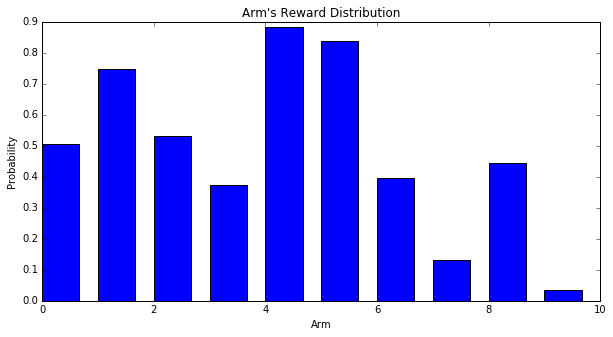

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.5068 
Average Regret: 0.375528269231
Arm pulls: [ 10001.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0  1.0]


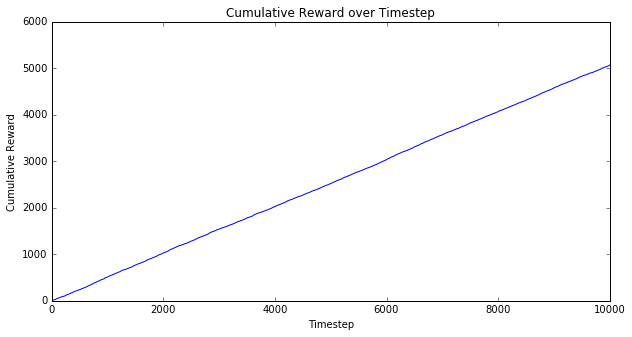

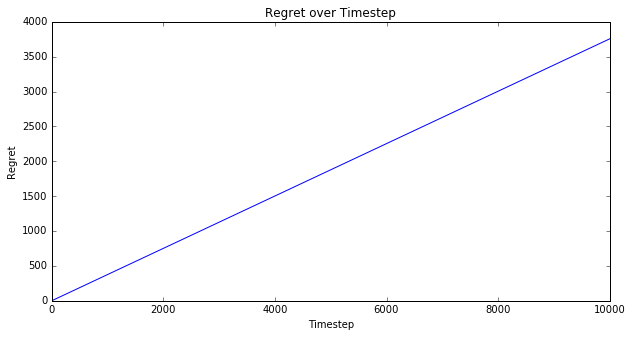

Playing with R = 1

Distribution: bernoulli [ 0.5061565   0.74836123  0.53065236  0.37446716  0.88168477  0.83849367
  0.3951277   0.13217982  0.44509856  0.03459039]
Optimal arm: 4


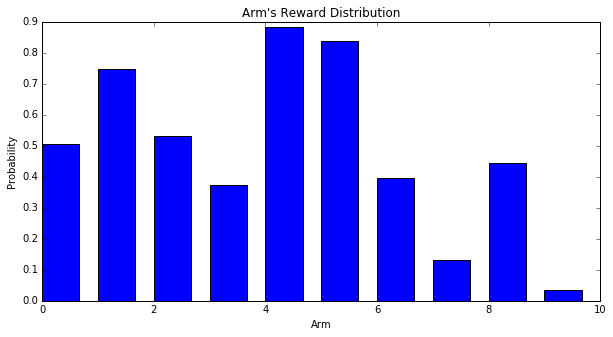

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8745 
Average Regret: 0.00055902211203
Arm pulls: [ 3.0  2.0  2.0  3.0  9972.0  20.0  2.0  2.0  2.0  2.0]


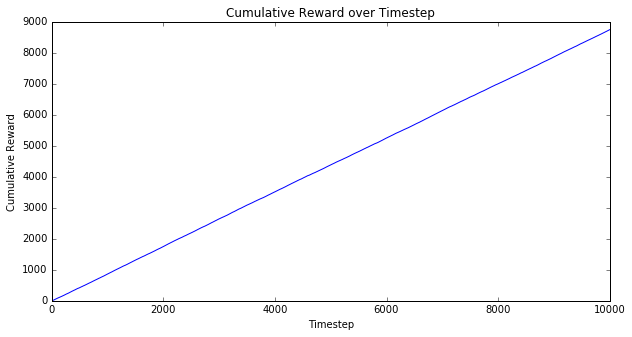

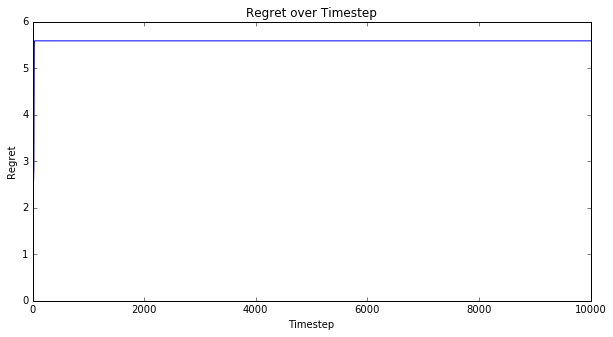

Playing with R = 3

Distribution: bernoulli [ 0.5061565   0.74836123  0.53065236  0.37446716  0.88168477  0.83849367
  0.3951277   0.13217982  0.44509856  0.03459039]
Optimal arm: 4


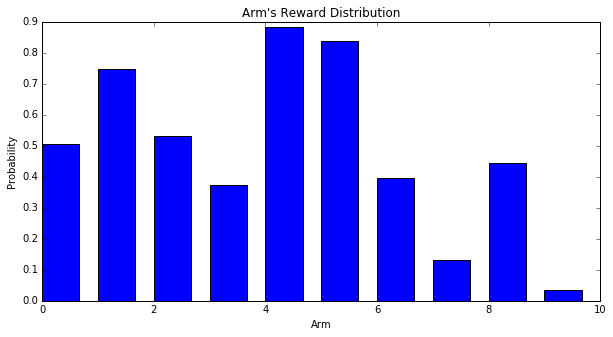

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8309 
Average Regret: 0.0447029551022
Arm pulls: [ 7.0  15.0  8.0  8.0  60.0  9891.0  4.0  4.0  9.0  4.0]


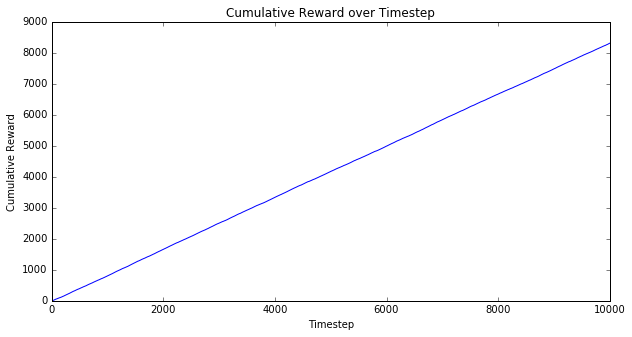

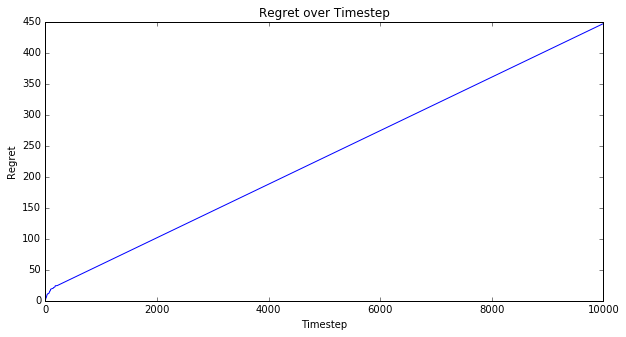

Playing with R = 5

Distribution: bernoulli [ 0.5061565   0.74836123  0.53065236  0.37446716  0.88168477  0.83849367
  0.3951277   0.13217982  0.44509856  0.03459039]
Optimal arm: 4


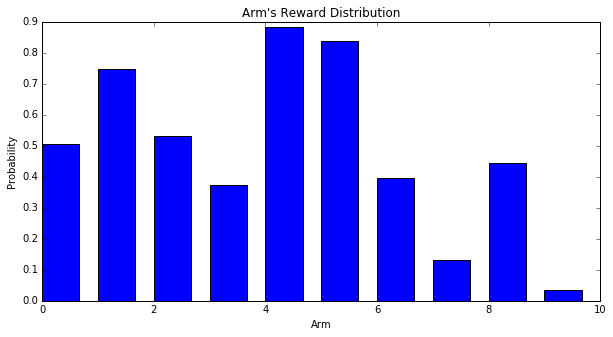

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.8714 
Average Regret: 0.00318285202408
Arm pulls: [ 7.0  26.0  9.0  7.0  9874.0  50.0  6.0  6.0  19.0  6.0]


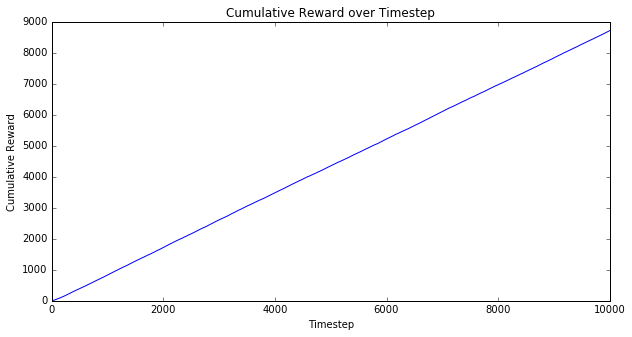

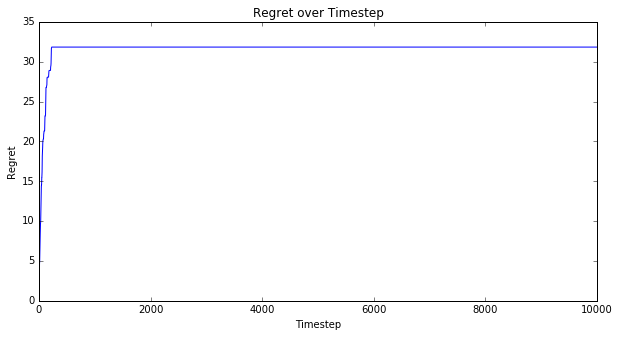

Playing with R = 10000

Distribution: bernoulli [ 0.5061565   0.74836123  0.53065236  0.37446716  0.88168477  0.83849367
  0.3951277   0.13217982  0.44509856  0.03459039]
Optimal arm: 4


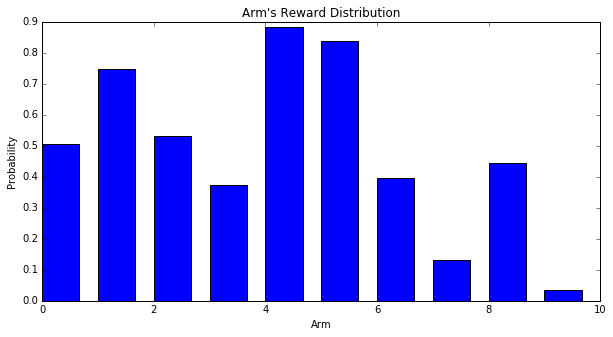

--------------------------------------------------
Policy: Optimistic Greedy 
Average Reward: 0.4959 
Average Regret: 0.386200328869
Arm pulls: [ 1003.0  1026.0  1006.0  990.0  1038.0  1036.0  991.0  967.0  996.0  957.0]


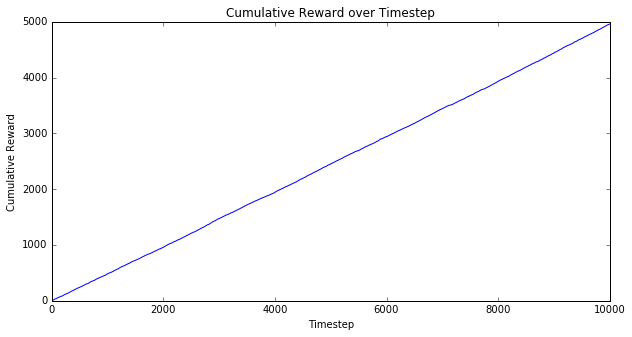

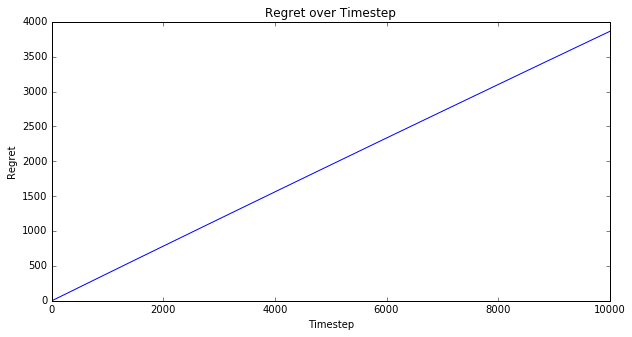

In [38]:
for R in [0, 1, 3, 5, 10000]:
    print('Playing with R = ' + str(R) + "\n")
    env = BanditEnv(num_actions, distribution, evaluation_seed)
    agent = OptimisticGreedy(num_actions, R)
    experiment = Experiment(env, agent)
    experiment.run_bandit(trials)